In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$\frac{d x}{d t}=\alpha x-\beta x y$$

$$\frac{d y}{d t}=\gamma x y-\delta y$$

In [3]:
def rk4(f, a, b, N, r0, params = []):
    h = (b - a) / N
    ts = np.linspace(a, b, N)
    r = np.zeros((len(r0), N), float)
    r[:, 0] = r0
    for i, t in enumerate(ts[1:]):
        r_t = r[:,i]
        k1 = h * f(r_t, t, *params)
        k2 = h * f(r_t + .5 * k1, t + .5 * h, *params)
        k3 = h * f(r_t + .5 * k2, t + .5 * h, *params)
        k4 = h * f(r_t + k3, t + h, *params)
        r[:,i + 1] = r_t + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return ts, r

In [4]:
def f(r, t, a, b):
    x, y = r
    return a * x - b * x * y

def g(r, t, c, d):
    x, y = r
    return c * x * y - d * y

def h(r, t, a, b, c, d):
    return np.array([f(r, t, a, b), g(r, t, c, d)])

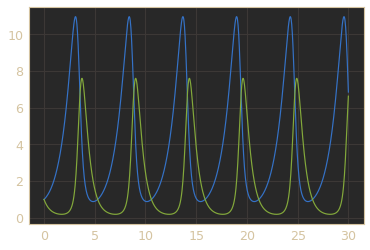

In [5]:
t, r = rk4(h, 0, 30, 1000, [1, 1], [1.0, .5, .5, 2.0])
plt.plot(t, r[0])
plt.plot(t, r[1])

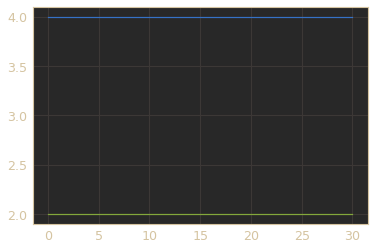

In [13]:
t, r = rk4(h, 0, 30, 1000, [4, 2], [1.0, .5, .5, 2.0])
plt.plot(t, r[0])
plt.plot(t, r[1])

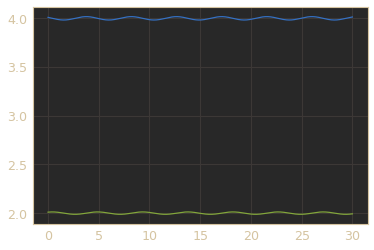

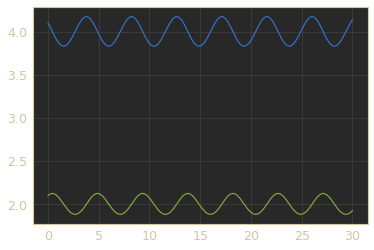

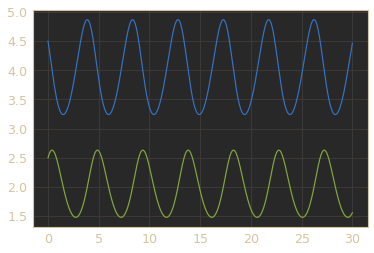

In [14]:
for epsilon in [.01, .1, .5]:
    t, r = rk4(h, 0, 30, 1000, [4+epsilon, 2+epsilon], [1.0, .5, .5, 2.0])
    plt.plot(t, r[0])
    plt.plot(t, r[1])
    plt.show()